# 播放次數、按讚數爬取

In [7]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

file_path = 'final.xlsx'
df = pd.read_excel(file_path)

new_data_list = []

for index, row in df.iterrows():
    url = row['link']
    driver = webdriver.Chrome()
    driver.get(url)

    # 使用id找到元素
    play_count_element = driver.find_element(By.ID, "countup-play")
    like_count_element = driver.find_element(By.ID, "countup-like")

    # 取得播放次數和喜歡次數
    play_count = play_count_element.text
    like_count = like_count_element.text

    # 關閉瀏覽器視窗
    driver.quit()

    # 將歌名、藝術家、播放次數、喜歡次數加入新的資料表
    temp_data = pd.DataFrame({
        'music': [row['music']],
        'artist': [row['artist']],
        'type': [row['type']],
        'play_count': [play_count],
        'like_count': [like_count]
    })
    new_data_list.append(temp_data)

# 合併所有新的資料表
new_data = pd.concat(new_data_list, ignore_index=True)

new_data

                          music                artist                 type  \
0                  紙飛機 Believer                   林潔心        Hip hop / Rap   
1                     捨不得睡 demo              郭子恆Jemmy  Singer / Songwriter   
2                         時間的足跡                   程銘奕                  Pop   
3              Broken 壞掉 (demo)  寒多路 / Cold Cold Road                 Rock   
4                         再見電影院        芒果醬 Mango Jump                  Pop   
..                          ...                   ...                  ...   
345                         很抱歉          蘇研之 Angie Su  Singer / Songwriter   
346            生而為我 我很抱歉 (demo)  寒多路 / Cold Cold Road                 Rock   
347                Take a Shine             回聲樂團 ECHO          Alternative   
348  BK-【那錯過的妳 I Miss You】audio                    BK        Hip hop / Rap   
349      Hello Huckleberry Finn              Goose 我鳥  Singer / Songwriter   

    play_count like_count  
0       57,653      1,872  
1      

In [16]:
new_data.to_excel('count.xlsx', index=True)

# 加總同個類型的按讚數跟播放次數

In [2]:
import pandas as pd

file_path = 'count.xlsx'
df = pd.read_excel(file_path)

# 轉換為整數
df['play_count'] = df['play_count'].replace(',', '', regex=True).astype(int)
df['like_count'] = df['like_count'].replace(',', '', regex=True).astype(int)

# 把相同type的play_count和like_count相加
type_totals = df.groupby('type')[['play_count', 'like_count']].sum().reset_index()

type_totals

,type,play_count,like_count
0,Alternative,498451,7256
1,Dance,118453,2474
2,Electronic,11073,292
3,Folk,5990,122
4,Hip hop / Rap,10068074,245827
5,Jazz,51210,2828
6,Metal,16369,148
7,Pop,8498857,135442
8,R&B / Soul,184140,6483
9,Reggae / Funk,3409,263


In [20]:
type_totals.to_excel('count_type.xlsx', index=True)

# 製作圖表

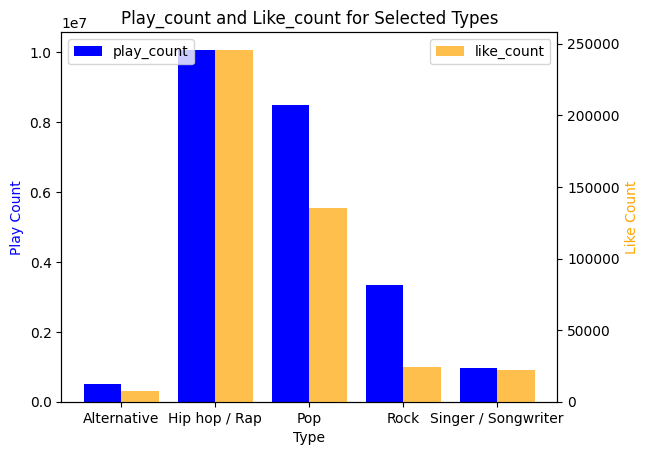

In [3]:
import matplotlib.pyplot as plt
import numpy as np

file_path = 'count_type.xlsx'
type_totals = pd.read_excel(file_path)

# 選擇前五種類別的數據
selected_types = ['Pop', 'Hip hop / Rap', 'Rock', 'Alternative', 'Singer / Songwriter']
selected_type_totals = type_totals[type_totals['type'].isin(selected_types)]


fig, ax = plt.subplots()
x = np.arange(len(selected_type_totals['type']))

# 繪製play_count
ax.bar(x - 0.2, selected_type_totals['play_count'], width=0.4, label='play_count', color='blue')

# 繪製like_count
ax2 = ax.twinx()
ax2.bar(x + 0.2, selected_type_totals['like_count'], width=0.4, label='like_count', color='orange', alpha=0.7)

# x軸
ax.set_xticks(x)
ax.set_xticklabels(selected_type_totals['type'])

# 標題
ax.set_xlabel('Type')
ax.set_ylabel('Play Count', color='blue')
ax2.set_ylabel('Like Count', color='orange')
plt.title('Play_count and Like_count for Selected Types')

# 顯示圖例
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig('type.png')